<a href="https://colab.research.google.com/github/QuinnCummings/QuinnCummings.github.io/blob/master/IMDB_web_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective:**

The goal of this script is to scrape data of the Top 250 Movies as rated on IMDb.com. After collecting the data we will preform Exploratory Data Analysis(EDA) to model and summarize this data.


# **Web Scraping** 
Using Python I will extract data from the Top 250 Movies as listed on IMDb.com. I will create a DataFrame with this data and export it to a csv file format.

In [2]:
#import packages
import bs4
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
top250_url = 'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
uClient = uReq(top250_url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html, 'html.parser')

containers = page_soup.findAll('tr') #tr - list element that contains individual movie data
containers = containers[1:] #discards useless first element

#create dataframe with columns
my_df = pd.DataFrame(columns = ['title', 'genre', 'imdb_rating', 'year', 'time_in_minutes',  'director', 'primary_star', 'secondary_star', 'tertiary_star'])


#loops through individual movie web pages to scrape data
for i in range(len(containers)): 
    #
    ref = containers[i].find('td',{'class':'titleColumn'}).a['href']
    movie_url = 'https://www.imdb.com'+ ref
    uClient = uReq(movie_url)
    movie_page_html = uClient.read()
    uClient.close()

    #soup object that contains data from the individual movie web page
    movie_page_soup = soup(movie_page_html, 'html.parser')

    #scrape director of movie
    plot = movie_page_soup.find('div', {'class':'plot_summary '})
    director = plot.a.text

    #scrape top 3 stars of the movie
    stars = movie_page_soup.findAll('div', {'class': 'credit_summary_item'})[2]
    a = stars.findAll('a')
    primary_star = a[0].text
    secondary_star = a[1].text
    tertiary_star = a[2].text

    #scrape movie length, age_rating, genre
    subtext = movie_page_soup.find('div',{'class':'subtext'})

    age_rating = subtext.text
    time = int(subtext.time['datetime'][2:-1]) # play time in minutes
    primary_genre = subtext.a.text

    #scrape title and rating
    title = containers[i].find('td',{'class':'titleColumn'}).a.text 
    year = int(containers[i].find('td',{'class':'titleColumn'}).span.text[1:-1])
    rating = float(containers[i].find('td',{'class':'ratingColumn imdbRating'}).strong.text)


    #create dictionary of all scraped data and appends to dataframe
    my_dict = { 'title': title, 'genre':primary_genre, 'imdb_rating':rating, 'year': year, 'time_in_minutes':time,  'director': director, 
                'primary_star':primary_star, 'secondary_star':secondary_star, 'tertiary_star':tertiary_star }            
    my_df = my_df.append(my_dict, ignore_index=True)

my_df.to_csv('imdb_scraped') #exports data as a csv file

# **Exploratory Data Analysis**
I will create exploratory data visualizations describe the data.

In [6]:
my_df.shape

(250, 9)

In [7]:
my_df.head()

,title,genre,imdb_rating,year,time_in_minutes,director,primary_star,secondary_star,tertiary_star
0,The Shawshank Redemption,Drama,9.2,1994,142,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton
1,The Godfather,Crime,9.1,1972,175,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan
2,The Godfather: Part II,Crime,9.0,1974,202,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall
3,The Dark Knight,Action,9.0,2008,152,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart
4,12 Angry Men,Crime,8.9,1957,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam


Text(0, 0.5, 'Count')

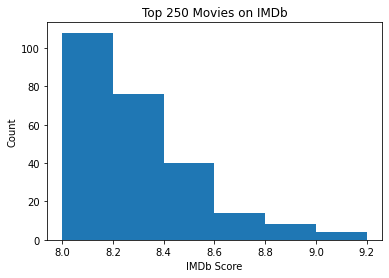

In [14]:
plt.hist(my_df['imdb_rating'], bins = 6)
plt.title('Top 250 Movies on IMDb')
plt.xlabel('IMDb Score')
plt.ylabel('Count')

The distribution of the IMDb shows how difficult it is for a movie to recieve a high rating and that it becomes exponentially more difficult to get a higher rating towards the top of the distrbution.

Text(0, 0.5, 'Movie Length (minutes)')

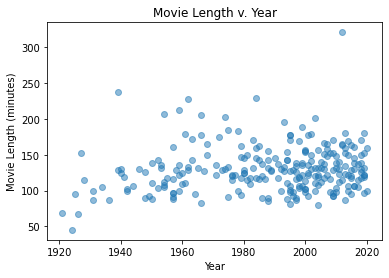

In [18]:
plt.scatter(my_df['year'],my_df['time_in_minutes'], alpha = 0.50)
plt.title('Movie Length v. Year')
plt.xlabel('Year')
plt.ylabel('Movie Length (minutes)')

Lets so who some of the best directors are. I am going to select the top 10 directors with the most movies in the Top 250 Movies list. With this data I will create a visual representation of the data with a hsitogram.

Text(0, 0.5, 'Number of Movies in Top 250')

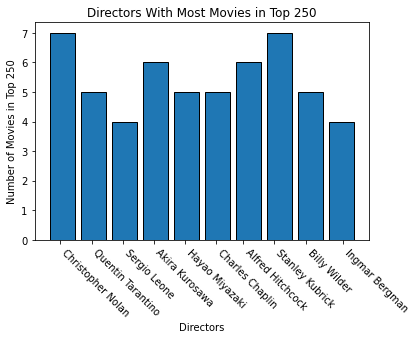

In [381]:
fig1, ax = plt.subplots()
top10_directors = my_df['director'].value_counts()[:10].index
plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
plt.xticks([0.4, 1.3, 2.2, 3.1, 4, 4.9, 5.7, 6.6, 7.5, 8.6], rotation = -45)
plt.hist(my_df[ my_df['director'].isin(top10_directors)]['director'], edgecolor='black', linewidth=1, rwidth=.8, bins = 10)
plt.title('Directors With Most Movies in Top 250')
plt.xlabel('Directors')
plt.ylabel('Number of Movies in Top 250')